In [247]:
import numpy as np,sys,time
from sklearn.utils import shuffle
import matplotlib
import tensorflow as tf
import tensorflow_datasets
import os
import input_data
import numpy as np,sys
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [248]:
def ReLu(x):
    mask = (x>0) * 1.0
    return mask *x
def d_ReLu(x):
    mask = (x>0) * 1.0
    return mask 

def Lrelu(x):
#    alpha = 0.0001
#    return np.where(x > 0, x, x * alpha) 
    mask = (x>0) * 1.0
    return mask *x
def d_Lrelu(x):
    mask = (x>0) * 1.0
    return mask 
    alpha = 0.0001
    return  - alpha * (x<0) +  (x>=0) * 1
def arctan(x):
    return np.arctan(x)
def d_arctan(x):
    return 1 / (1 + x ** 2)

def log(x):
    return 1 / ( 1+ np.exp(-1*x))
def d_log(x):
    return log(x) * (1 - log(x))

def tanh(x):
    return np.tanh(x)
def d_tanh(x):
    return 1 - np.tanh(x) ** 2

def plot(samples, title):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.title(title)
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [250]:
random_numer = int(input("Please Input a Random Number to Seed"))
np.random.seed(random_numer)

Please Input a Random Number to Seed3


In [251]:
# 1. Load Data and declare hyper
print('--------- Load Data ----------')
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
temp = mnist.test
images, labels = temp.images, temp.labels
images, labels = shuffle(np.asarray(images),np.asarray(labels))
num_epoch = 50
learing_rate = 0.00009
G_input = 100
hidden_input,hidden_input2,hidden_input3 = 128,256,346
hidden_input4,hidden_input5,hidden_input6 = 480,560,686
hidden_input7,hidden_input8,hidden_input9 = 800,1020,1400
hidden_input10 = 1800

--------- Load Data ----------
Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [252]:
print('--------- Declare Hyper Parameters ----------')
# 2. Declare Weights
D_W1 = np.random.normal(size=(784,hidden_input),scale=(1. / np.sqrt(784 / 2.)))   *0.002
# D_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))       *0.002
D_b1 = np.zeros(hidden_input)

D_W2 = np.random.normal(size=(hidden_input,hidden_input2),scale=(1. / np.sqrt(hidden_input / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
D_b2 = np.zeros(hidden_input2)

D_W3 = np.random.normal(size=(hidden_input2,hidden_input3),scale=(1. / np.sqrt(hidden_input2 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
D_b3 = np.zeros(hidden_input3)

D_W4 = np.random.normal(size=(hidden_input3,1),scale=(1. / np.sqrt(hidden_input / 2.)))     *0.002
# D_b2 = np.random.normal(size=(1),scale=(1. / np.sqrt(1 / 2.)))           *0.002
D_b4 = np.zeros(1)


G_W1 = np.random.normal(size=(G_input,hidden_input),scale=(1. / np.sqrt(G_input / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b1 = np.zeros(hidden_input)

G_W2 = np.random.normal(size=(hidden_input,hidden_input2),scale=(1. / np.sqrt(hidden_input / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b2 = np.zeros(hidden_input2)

G_W3 = np.random.normal(size=(hidden_input2,hidden_input3),scale=(1. / np.sqrt(hidden_input2 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b3 = np.zeros(hidden_input3)

G_W4 = np.random.normal(size=(hidden_input3,hidden_input4),scale=(1. / np.sqrt(hidden_input3 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b4 = np.zeros(hidden_input4)

G_W5 = np.random.normal(size=(hidden_input4,hidden_input5),scale=(1. / np.sqrt(hidden_input4 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b5 = np.zeros(hidden_input5)

G_W6 = np.random.normal(size=(hidden_input5,hidden_input6),scale=(1. / np.sqrt(hidden_input5 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b6 = np.zeros(hidden_input6)

G_W7 = np.random.normal(size=(hidden_input6,hidden_input7),scale=(1. / np.sqrt(hidden_input5 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b7 = np.zeros(hidden_input7)

G_W8 = np.random.normal(size=(hidden_input7,hidden_input8),scale=(1. / np.sqrt(hidden_input5 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b8 = np.zeros(hidden_input8)

G_W9 = np.random.normal(size=(hidden_input8,hidden_input9),scale=(1. / np.sqrt(hidden_input5 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b9 = np.zeros(hidden_input9)

G_W10 = np.random.normal(size=(hidden_input9,hidden_input10),scale=(1. / np.sqrt(hidden_input5 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b10 = np.zeros(hidden_input10)

G_W11 = np.random.normal(size=(hidden_input10,784),scale=(1. / np.sqrt(hidden_input6 / 2.)))  *0.002
# G_b2 = np.random.normal(size=(784),scale=(1. / np.sqrt(784 / 2.)))      *0.002
G_b11 = np.zeros(784)

--------- Declare Hyper Parameters ----------


In [253]:
# 3. For Adam Optimzier
m1w1,m1b1 = 0,0
m2w2,m2b2 = 0,0
m3w3,m3b3 = 0,0
m4w4,m4b4 = 0,0

v1w1,v1b1 = 0,0
v2w2,v2b2 = 0,0
v3w3,v3b3 = 0,0
v4w4,v4b4 = 0,0

v5,m5 = 0,0
v6,m6 = 0,0
v7,m7 = 0,0
v8,m8 = 0,0
v9,m9 = 0,0
v10,m10 = 0,0
v11,m11 = 0,0
v12,m12 = 0,0
v13,m13 = 0,0
v14,m14 = 0,0
v15,m15 = 0,0
v16,m16 = 0,0
v17,m17 = 0,0
v19,m19 = 0,0
v20,m20 = 0,0
v21,m21 = 0,0
v22,m22 = 0,0
v23,m23 = 0,0
v24,m24 = 0,0
v25,m25 = 0,0
v26,m26 = 0,0


In [254]:
beta_1,beta_2,eps = 0.9,0.999,0.00000001

In [265]:
print('--------- Started Training ----------')
for iter in range(num_epoch+50):
    random_int = np.random.randint(len(images) - 5)
    current_image = np.expand_dims(images[random_int],axis=0)
    #fig = plot(current_image,"REAL")
    # Func: Generate The first Fake Data
    Z = np.random.uniform(-1., 1., size=[1, G_input])
    Gl1 = Z.dot(G_W1) + G_b1
    Gl1A = Lrelu(Gl1)
    Gl2 = Gl1A.dot(G_W2) + G_b2
    Gl2A = Lrelu(Gl2)
    Gl3 = Gl2A.dot(G_W3) + G_b3
    Gl3A = Lrelu(Gl3)
    Gl4 = Gl3A.dot(G_W4) + G_b4
    Gl4A = Lrelu(Gl4)
    Gl5 = Gl4A.dot(G_W5) + G_b5
    Gl5A = Lrelu(Gl5)
    Gl6 = Gl5A.dot(G_W6) + G_b6
    Gl6A = Lrelu(Gl6)
    Gl7 = Gl6A.dot(G_W7) + G_b7
    Gl7A = Lrelu(Gl7)
    Gl8 = Gl7A.dot(G_W8) + G_b8
    Gl8A = Lrelu(Gl8)
    Gl9 = Gl8A.dot(G_W9) + G_b9
    Gl9A = Lrelu(Gl9)
    Gl10 = Gl9A.dot(G_W10) + G_b10
    Gl10A = Lrelu(Gl10)
    Gl11 = Gl10A.dot(G_W11) + G_b11

    current_fake_data = log(Gl11)

    # Func: Forward Feed for Real data
    Dl1_r = current_image.dot(D_W1) + D_b1
    Dl1_rA = Lrelu(Dl1_r)
    Dl2_r = Dl1_rA.dot(D_W2) + D_b2
    Dl2_rA = Lrelu(Dl2_r)
    Dl3_r = Dl2_rA.dot(D_W3) + D_b3
    Dl3_rA = Lrelu(Dl3_r)
    Dl4_r = Dl3_rA.dot(D_W4) + D_b4
    Dl4_rA = log(Dl4_r)

    # Func: Forward Feed for Fake Data
    Dl1_f = current_fake_data.dot(D_W1) + D_b1
    Dl1_fA = Lrelu(Dl1_f)
    Dl2_f = Dl1_fA.dot(D_W2) + D_b2
    Dl2_fA = Lrelu(Dl2_f)
    Dl3_f = Dl2_fA.dot(D_W3) + D_b3
    Dl3_fA = Lrelu(Dl3_f)
    Dl4_f = Dl3_fA.dot(D_W4) + D_b4
    Dl4_fA = log(Dl4_f)


    # Func: Cost D
    D_cost = -(np.log(Dl4_rA) + np.log(1.0- Dl4_fA))

    # Func: Gradient
    grad_f_w4_part_1 =  1/(1.0- Dl4_fA)
    grad_f_w4_part_2 =  d_log(Dl4_f)
    grad_f_w4_part_3 =   Dl3_fA
    grad_f_w4 =     grad_f_w4_part_3.T.dot(grad_f_w4_part_1 * grad_f_w4_part_2) 
    grad_f_b4 = grad_f_w4_part_1 * grad_f_w4_part_2

    grad_f_w3_part_1 =  (grad_f_w4_part_1 * grad_f_w4_part_2).dot(D_W4.T)
    grad_f_w3_part_2 =  d_ReLu(Dl3_f)
    grad_f_w3_part_3 =   Dl2_fA
    grad_f_w3 =       grad_f_w3_part_3.T.dot(grad_f_w3_part_1 * grad_f_w3_part_2) 
    grad_f_b3 =      grad_f_w3_part_1 * grad_f_w3_part_2
    
    grad_f_w2_part_1 = (grad_f_w3_part_1 * grad_f_w3_part_2).dot(D_W3.T)
    grad_f_w2_part_2 = d_ReLu(Dl2_f)
    grad_f_w2_part_3 = Dl1_fA
    grad_f_w2 = grad_f_w2_part_3.T.dot(grad_f_w2_part_1 * grad_f_w2_part_2)
    grad_f_b2 = (grad_f_w2_part_1 * grad_f_w2_part_2)

    grad_f_w1_part_1 = (grad_f_w2_part_1 * grad_f_w2_part_2).dot(D_W2.T)
    grad_f_w1_part_2 = d_ReLu(Dl1_f)
    grad_f_w1_part_3 = current_fake_data
    grad_f_w1 = grad_f_w1_part_3.T.dot(grad_f_w1_part_1 * grad_f_w1_part_2)
    grad_f_b1 = grad_f_w1_part_1 * grad_f_w1_part_2
    
    #LATER
    grad_r_w4_part_1 =  1/(1.0- Dl4_rA)
    grad_r_w4_part_2 =  d_log(Dl4_r)
    grad_r_w4_part_3 =   Dl3_rA
    grad_r_w4 =     grad_r_w4_part_3.T.dot(grad_r_w4_part_1 * grad_r_w4_part_2) 
    grad_r_b4 = grad_r_w4_part_1 * grad_r_w4_part_2

    grad_r_w3_part_1 =  (grad_r_w4_part_1 * grad_r_w4_part_2).dot(D_W4.T)
    grad_r_w3_part_2 =  d_ReLu(Dl3_r)
    grad_r_w3_part_3 =   Dl2_rA
    grad_r_w3 =       grad_r_w3_part_3.T.dot(grad_r_w3_part_1 * grad_r_w3_part_2) 
    grad_r_b3 =      grad_r_w3_part_1 * grad_r_w3_part_2
    
    grad_r_w2_part_1 = (grad_r_w3_part_1 * grad_r_w3_part_2).dot(D_W3.T)
    grad_r_w2_part_2 = d_ReLu(Dl2_r)
    grad_r_w2_part_3 = Dl1_rA
    grad_r_w2 = grad_r_w2_part_3.T.dot(grad_r_w2_part_1 * grad_r_w2_part_2)
    grad_r_b2 = (grad_r_w2_part_1 * grad_r_w2_part_2)

    grad_r_w1_part_1 = (grad_r_w2_part_1 * grad_r_w2_part_2).dot(D_W2.T)
    grad_r_w1_part_2 = d_ReLu(Dl1_r)
    grad_r_w1_part_3 = current_image
    grad_r_w1 = grad_r_w1_part_3.T.dot(grad_r_w1_part_1 * grad_r_w1_part_2)
    grad_r_b1 = grad_r_w1_part_1 * grad_r_w1_part_2

    grad_w1 =grad_f_w1 + grad_r_w1
    grad_w2 =grad_f_w2 + grad_r_w2
    grad_w3 =grad_f_w3 + grad_r_w3
    grad_w4 =grad_f_w4 + grad_r_w4

    grad_b1 =grad_f_b1 + grad_r_b1
    grad_b2 =grad_f_b2 + grad_r_b2
    grad_b3 =grad_f_b3 + grad_r_b3
    grad_b4 =grad_f_b4 + grad_r_b4

    # ---- Update Gradient ----
    m1w1 = beta_1 * m1w1 + (1 - beta_1) * grad_w1
    v1w1 = beta_2 * v1w1 + (1 - beta_2) * grad_w1 ** 2
    
    m2w2 = beta_1 * m2w2 + (1 - beta_1) * grad_w2
    v2w2 = beta_2 * v2w2 + (1 - beta_2) * grad_w2 ** 2
    
    m3w3 = beta_1 * m3w3 + (1 - beta_1) * grad_w3
    v3w3 = beta_2 * v3w3 + (1 - beta_2) * grad_w3 ** 2
    
    m4w4 = beta_1 * m4w4 + (1 - beta_1) * grad_w4
    v4w4 = beta_2 * v4w4 + (1 - beta_2) * grad_w4 ** 2
    
    m1b1 = beta_1 * m1b1 + (1 - beta_1) * grad_b1
    v1b1 = beta_2 * v1b1 + (1 - beta_2) * grad_b1 ** 2
    
    m2b2 = beta_1 * m2b2 + (1 - beta_1) * grad_b2
    v2b2 = beta_2 * v2b2 + (1 - beta_2) * grad_b2 ** 2
    
    m3b3 = beta_1 * m3b3 + (1 - beta_1) * grad_b3
    v3b3 = beta_2 * v3b3 + (1 - beta_2) * grad_b3 ** 2
    
    m4b4 = beta_1 * m4b4 + (1 - beta_1) * grad_b4
    v4b4 = beta_2 * v4b4 + (1 - beta_2) * grad_b4 ** 2

    D_W1 = D_W1 - (learing_rate / (np.sqrt(v1w1 /(1-beta_2)**iter ) + eps)) * (m1v1/(1-beta_1)**iter)
    D_b1 = D_b1 - (learing_rate / (np.sqrt(v1b1 /(1-beta_2)**iter ) + eps)) * (m1b1/(1-beta_1)**iter)
        
    D_W2 = D_W2 - (learing_rate / (np.sqrt(v2w2 /(1-beta_2)**iter ) + eps)) * (m2v2/(1-beta_1)**iter)
    D_b2 = D_b2 - (learing_rate / (np.sqrt(v2b2 /(1-beta_2)**iter ) + eps)) * (m2b2/(1-beta_1)**iter)
    
    D_W3 = D_W3 - (learing_rate / (np.sqrt(v3w3 /(1-beta_2)**iter ) + eps)) * (m3v3/(1-beta_1)**iter)
    D_b3 = D_b3 - (learing_rate / (np.sqrt(v3b3 /(1-beta_2)**iter ) + eps)) * (m3b3/(1-beta_1)**iter)
    
    D_W4 = D_W4 - (learing_rate / (np.sqrt(v4w4 /(1-beta_2)**iter ) + eps)) * (m4v4/(1-beta_1)**iter)
    D_b4 = D_b4 - (learing_rate / (np.sqrt(v4b4 /(1-beta_2)**iter ) + eps)) * (m4b4/(1-beta_1)**iter)
    
    # Func: Forward Feed for G
    Z = np.random.normal(-1., 1., size=[1, G_input]) 
    Gl1 = Z.dot(G_W1) + G_b1
    Gl1A = Lrelu(Gl1)
    Gl2 = Gl1A.dot(G_W2) + G_b2
    Gl2A = Lrelu(Gl2)
    Gl3 = Gl2A.dot(G_W3) + G_b3
    Gl3A = Lrelu(Gl3)
    Gl4 = Gl3A.dot(G_W4) + G_b4
    Gl4A = Lrelu(Gl4)
    Gl5 = Gl4A.dot(G_W5) + G_b5
    Gl5A = Lrelu(Gl5)
    Gl6 = Gl5A.dot(G_W6) + G_b6
    Gl6A = Lrelu(Gl6)
    Gl7 = Gl6A.dot(G_W7) + G_b7
    Gl7A = Lrelu(Gl7)
    Gl8 = Gl7A.dot(G_W8) + G_b8
    Gl8A = Lrelu(Gl8)
    Gl9 = Gl8A.dot(G_W9) + G_b9
    Gl9A = Lrelu(Gl9)
    Gl10 = Gl9A.dot(G_W10) + G_b10
    Gl10A = Lrelu(Gl10)
    Gl11 = Gl10A.dot(G_W11) + G_b11
    
    current_fake_data = log(Gl11)
    #fig = plot(current_fake_data,"FAKE")
    Dl1 = current_fake_data.dot(D_W1) + D_b1
    Dl1_A = Lrelu(Dl1)
    Dl2 = Dl1_A.dot(D_W2) + D_b2
    Dl2_A = Lrelu(Dl2)
    Dl3 = Dl2_A.dot(D_W3) + D_b3
    Dl3_A = Lrelu(Dl3)
    Dl4 = Dl3_A.dot(D_W4) + D_b4
    Dl4_A = log(Dl4)

    # Func: Cost G
    G_cost = -np.log(Dl4_A)

    # Func: Gradient
    grad_G_w11_part_1 = (( (-1/Dl4_A) * d_log(Dl4).dot(D_W4.T) * (d_Lrelu(Dl3)) ).dot(D_W3.T).dot(D_W2.T).dot(D_W1.T))
    grad_G_w11_part_2 = d_log(Gl11)
    grad_G_w11_part_3 = Gl10A
    grad_G_w11 = grad_G_w11_part_3.T.dot(grad_G_w11_part_1 * grad_G_w11_part_1)
    grad_G_b11 = grad_G_w11_part_1 * grad_G_w11_part_2

    grad_G_w10_part_1 = (grad_G_w11_part_1 * grad_G_w11_part_2).dot(G_W11.T)
    grad_G_w10_part_2 = d_Lrelu(Gl10)
    grad_G_w10_part_3 = Gl9A
    grad_G_w10 = grad_G_w10_part_3.T.dot(grad_G_w10_part_1 * grad_G_w10_part_2)
    grad_G_b10 = (grad_G_w10_part_1 * grad_G_w10_part_2)
    
    grad_G_w9_part_1 = (grad_G_w10_part_1 * grad_G_w10_part_2).dot(G_W10.T)
    grad_G_w9_part_2 = d_Lrelu(Gl9)
    grad_G_w9_part_3 = Gl8A
    grad_G_w9 = grad_G_w9_part_3.T.dot(grad_G_w9_part_1 * grad_G_w9_part_2)
    grad_G_b9 = (grad_G_w9_part_1 * grad_G_w9_part_2)
    
    grad_G_w8_part_1 = (grad_G_w9_part_1 * grad_G_w9_part_2).dot(G_W9.T)
    grad_G_w8_part_2 = d_Lrelu(Gl8)
    grad_G_w8_part_3 = Gl7A
    grad_G_w8 = grad_G_w8_part_3.T.dot(grad_G_w8_part_1 * grad_G_w8_part_2)
    grad_G_b8 = (grad_G_w8_part_1 * grad_G_w8_part_2)
   
    grad_G_w7_part_1 = (grad_G_w8_part_1 * grad_G_w8_part_2).dot(G_W8.T)
    grad_G_w7_part_2 = d_Lrelu(Gl7)
    grad_G_w7_part_3 = Gl6A
    grad_G_w7 = grad_G_w7_part_3.T.dot(grad_G_w7_part_1 * grad_G_w7_part_2)
    grad_G_b7 = (grad_G_w7_part_1 * grad_G_w7_part_2)

    grad_G_w6_part_1 = (grad_G_w7_part_1 * grad_G_w7_part_2).dot(G_W7.T)
    grad_G_w6_part_2 = d_Lrelu(Gl6)
    grad_G_w6_part_3 = Gl5A
    grad_G_w6 = grad_G_w6_part_3.T.dot(grad_G_w6_part_1 * grad_G_w6_part_2)
    grad_G_b6 = (grad_G_w6_part_1 * grad_G_w6_part_2)

    grad_G_w5_part_1 = (grad_G_w6_part_1 * grad_G_w6_part_2).dot(G_W6.T)
    grad_G_w5_part_2 = d_Lrelu(Gl5)
    grad_G_w5_part_3 = Gl4A
    grad_G_w5 = grad_G_w5_part_3.T.dot(grad_G_w5_part_1 * grad_G_w5_part_2)
    grad_G_b5 = (grad_G_w5_part_1 * grad_G_w5_part_2)

    grad_G_w4_part_1 = (grad_G_w5_part_1 * grad_G_w5_part_2).dot(G_W5.T)
    grad_G_w4_part_2 = d_Lrelu(Gl4)
    grad_G_w4_part_3 = Gl3A
    grad_G_w4 = grad_G_w4_part_3.T.dot(grad_G_w4_part_1 * grad_G_w4_part_2)
    grad_G_b4 = (grad_G_w4_part_1 * grad_G_w4_part_2)

    grad_G_w3_part_1 = (grad_G_w4_part_1 * grad_G_w4_part_2).dot(G_W4.T)
    grad_G_w3_part_2 = d_Lrelu(Gl3)
    grad_G_w3_part_3 = Gl2A
    grad_G_w3 = grad_G_w3_part_3.T.dot(grad_G_w3_part_1 * grad_G_w3_part_2)
    grad_G_b3 = (grad_G_w3_part_1 * grad_G_w3_part_2)

    grad_G_w2_part_1 = (grad_G_w3_part_1 * grad_G_w3_part_2).dot(G_W3.T)
    grad_G_w2_part_2 = d_Lrelu(Gl2)
    grad_G_w2_part_3 = Gl1A
    grad_G_w2 = grad_G_w2_part_3.T.dot(grad_G_w2_part_1 * grad_G_w2_part_2)
    grad_G_b2 = (grad_G_w2_part_1 * grad_G_w2_part_2)

    grad_G_w1_part_1 = (grad_G_w2_part_1 * grad_G_w2_part_2).dot(G_W2.T)
    grad_G_w1_part_2 = d_Lrelu(Gl1)
    grad_G_w1_part_3 = Z
    grad_G_w1 = grad_G_w1_part_3.T.dot(grad_G_w1_part_1 * grad_G_w1_part_2)
    grad_G_b1 = grad_G_w1_part_1 * grad_G_w1_part_2

    # ---- Update Gradient ----
    m5 = beta_1 * m5 + (1 - beta_1) * grad_G_w1
    v5 = beta_2 * v5 + (1 - beta_2) * grad_G_w1 ** 2

    m6 = beta_1 * m6 + (1 - beta_1) * grad_G_b1
    v6 = beta_2 * v6 + (1 - beta_2) * grad_G_b1 ** 2

    m7 = beta_1 * m7 + (1 - beta_1) * grad_G_w2
    v7 = beta_2 * v7 + (1 - beta_2) * grad_G_w2 ** 2

    m8 = beta_1 * m8 + (1 - beta_1) * grad_G_b2
    v8 = beta_2 * v8 + (1 - beta_2) * grad_G_b2 ** 2

    m9 = beta_1 * m9 + (1 - beta_1) * grad_G_w3
    v9 = beta_2 * v9 + (1 - beta_2) * grad_G_w3 ** 2

    m10 = beta_1 * m10 + (1 - beta_1) * grad_G_b3
    v10 = beta_2 * v10 + (1 - beta_2) * grad_G_b3 ** 2

    m11 = beta_1 * m11 + (1 - beta_1) * grad_G_w4
    v11 = beta_2 * v11 + (1 - beta_2) * grad_G_w4 ** 2

    m12 = beta_1 * m12 + (1 - beta_1) * grad_G_b4
    v12 = beta_2 * v12 + (1 - beta_2) * grad_G_b4 ** 2

    m13 = beta_1 * m13 + (1 - beta_1) * grad_G_w5
    v13 = beta_2 * v13 + (1 - beta_2) * grad_G_w5 ** 2

    m14 = beta_1 * m14 + (1 - beta_1) * grad_G_b5
    v14 = beta_2 * v14 + (1 - beta_2) * grad_G_b5 ** 2

    m15 = beta_1 * m15 + (1 - beta_1) * grad_G_w6
    v15 = beta_2 * v15 + (1 - beta_2) * grad_G_w6 ** 2

    m16 = beta_1 * m16 + (1 - beta_1) * grad_G_b6
    v16 = beta_2 * v16 + (1 - beta_2) * grad_G_b6 ** 2

    m17 = beta_1 * m17 + (1 - beta_1) * grad_G_w7
    v17 = beta_2 * v17 + (1 - beta_2) * grad_G_w7 ** 2

    m18 = beta_1 * m18 + (1 - beta_1) * grad_G_b7
    v18 = beta_2 * v18 + (1 - beta_2) * grad_G_b7 ** 2
    
    m19 = beta_1 * m19 + (1 - beta_1) * grad_G_w8
    v19 = beta_2 * v19 + (1 - beta_2) * grad_G_w8 ** 2
    
    m20 = beta_1 * m20 + (1 - beta_1) * grad_G_b8
    v20 = beta_2 * v20 + (1 - beta_2) * grad_G_b8 ** 2
    
    m21 = beta_1 * m21 + (1 - beta_1) * grad_G_w9
    v21 = beta_2 * v21 + (1 - beta_2) * grad_G_w9 ** 2
    
    m22 = beta_1 * m22 + (1 - beta_1) * grad_G_b9
    v22 = beta_2 * v22 + (1 - beta_2) * grad_G_b9 ** 2
    
    m23 = beta_1 * m23 + (1 - beta_1) * grad_G_w10
    v23 = beta_2 * v23 + (1 - beta_2) * grad_G_w10 ** 2

    m24 = beta_1 * m24 + (1 - beta_1) * grad_G_b10
    v24 = beta_2 * v24 + (1 - beta_2) * grad_G_b10 ** 2
    
    m25 = beta_1 * m25 + (1 - beta_1) * grad_G_w11
    v25 = beta_2 * v25 + (1 - beta_2) * grad_G_w11 ** 2
    
    m26 = beta_1 * m26 + (1 - beta_1) * grad_G_b11
    v26 = beta_2 * v26 + (1 - beta_2) * grad_G_b11 ** 2
    

    G_W1 = G_W1 - (learing_rate / (np.sqrt(v5 /(1-beta_2)**iter ) + eps)) * (m5/(1-beta_1)**iter)
    G_b1 = G_b1 - (learing_rate / (np.sqrt(v6 /(1-beta_2)**iter ) + eps)) * (m6/(1-beta_1)**iter)
    
    G_W2 = G_W2 - (learing_rate / (np.sqrt(v7 /(1-beta_2)**iter ) + eps)) * (m7/(1-beta_1)**iter)
    G_b2 = G_b2 - (learing_rate / (np.sqrt(v8 /(1-beta_2)**iter ) + eps)) * (m8/(1-beta_1)**iter)

    G_W3 = G_W3 - (learing_rate / (np.sqrt(v9 /(1-beta_2)**iter ) + eps)) * (m9/(1-beta_1)**iter)
    G_b3 = G_b3 - (learing_rate / (np.sqrt(v10 /(1-beta_2)**iter ) + eps)) * (m10/(1-beta_1)**iter)

    G_W4 = G_W4 - (learing_rate / (np.sqrt(v11 /(1-beta_2)**iter ) + eps)) * (m11/(1-beta_1)**iter)
    G_b4 = G_b4 - (learing_rate / (np.sqrt(v12 /(1-beta_2)**iter ) + eps)) * (m12/(1-beta_1)**iter)

    G_W5 = G_W5 - (learing_rate / (np.sqrt(v13 /(1-beta_2)**iter ) + eps)) * (m13/(1-beta_1)**iter)
    G_b5 = G_b5 - (learing_rate / (np.sqrt(v14 /(1-beta_2)**iter ) + eps)) * (m14/(1-beta_1)**iter)

    G_W6 = G_W6 - (learing_rate / (np.sqrt(v15 /(1-beta_2)**iter ) + eps)) * (m15/(1-beta_1)**iter)
    G_b6 = G_b6 - (learing_rate / (np.sqrt(v16 /(1-beta_2)**iter ) + eps)) * (m16/(1-beta_1)**iter)

    G_W7 = G_W7 - (learing_rate / (np.sqrt(v17 /(1-beta_2)**iter ) + eps)) * (m17/(1-beta_1)**iter)
    G_b7 = G_b7 - (learing_rate / (np.sqrt(v18 /(1-beta_2)**iter ) + eps)) * (m18/(1-beta_1)**iter)
    
    G_W8 = G_W8 - (learing_rate / (np.sqrt(v19 /(1-beta_2)**iter ) + eps)) * (m19/(1-beta_1)**iter)
    G_b8 = G_b8 - (learing_rate / (np.sqrt(v20 /(1-beta_2)**iter ) + eps)) * (m20/(1-beta_1)**iter)
    
    G_W9 = G_W9 - (learing_rate / (np.sqrt(v21 /(1-beta_2)**iter ) + eps)) * (m21/(1-beta_1)**iter)
    G_b9 = G_b9 - (learing_rate / (np.sqrt(v22 /(1-beta_2)**iter ) + eps)) * (m22/(1-beta_1)**iter)
    
    G_W10 = G_W10 - (learing_rate / (np.sqrt(v23 /(1-beta_2)**iter ) + eps)) * (m23/(1-beta_1)**iter)
    G_b10 = G_b10 - (learing_rate / (np.sqrt(v24 /(1-beta_2)**iter ) + eps)) * (m24/(1-beta_1)**iter)
    
    G_W11 = G_W11 - (learing_rate / (np.sqrt(v25 /(1-beta_2)**iter ) + eps)) * (m25/(1-beta_1)**iter)
    G_b11 = G_b11 - (learing_rate / (np.sqrt(v26 /(1-beta_2)**iter ) + eps)) * (m26/(1-beta_1)**iter)

    print("Current Iter: ",iter, " Current D cost:",D_cost, " Current G cost: ", G_cost)
    
    if iter == 0:
        learing_rate = learing_rate * 0.01
    if iter == 40:
        learing_rate = learing_rate * 0.01

    # ---- Print to Out put ----
# -- end code --

--------- Started Training ----------
Current Iter:  0  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  1  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  2  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  3  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  4  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  5  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  6  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  7  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  8  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  9  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  10  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]
Current Iter:  11  Current D cost: [[1.38629438]]  Current 

Current Iter:  99  Current D cost: [[1.38629438]]  Current G cost:  [[0.69329351]]


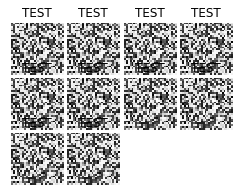

In [273]:
l=[]
for i in range(10):
    Z = np.random.uniform(-1., 1., size=[1, G_input])
    Gl1 = Z.dot(G_W1) + G_b1
    Gl1A = Lrelu(Gl1)
    Gl2 = Gl1A.dot(G_W2) + G_b2
    Gl2A = Lrelu(Gl2)
    Gl3 = Gl2A.dot(G_W3) + G_b3
    Gl3A = Lrelu(Gl3)
    Gl4 = Gl3A.dot(G_W4) + G_b4
    Gl4A = Lrelu(Gl4)
    Gl5 = Gl4A.dot(G_W5) + G_b5
    Gl5A = Lrelu(Gl5)
    Gl6 = Gl5A.dot(G_W6) + G_b6
    Gl6A = Lrelu(Gl6)
    Gl7 = Gl6A.dot(G_W7) + G_b7
    Gl7A = Lrelu(Gl7)
    Gl8 = Gl7A.dot(G_W8) + G_b8
    Gl8A = Lrelu(Gl8)
    Gl9 = Gl8A.dot(G_W9) + G_b9
    Gl9A = Lrelu(Gl9)
    Gl10 = Gl9A.dot(G_W10) + G_b10
    Gl10A = Lrelu(Gl10)
    Gl11 = Gl10A.dot(G_W11) + G_b11

    current_fake_data = log(Gl11)
    l.append(current_fake_data)
fig = plot(l,"TEST")
fig.savefig('Click_Me_{}.png'.format(str(iter).zfill(3)+"_Ginput_"+str(G_input)+ "_hiddenone"+str(hidden_input) + "_hiddentwo"+str(hidden_input2) + "_LR_" + str(learing_rate)), bbox_inches='tight')

In [269]:
grad_f_w1_part_1 = (grad_f_w2_part_1 * grad_f_w2_part_2).dot(D_W2.T)
grad_f_w1_part_2 = d_ReLu(Dl1_f)
grad_f_w1_part_3 = current_fake_data
grad_f_w1 = grad_f_w1_part_3.T.dot(grad_f_w1_part_1 * grad_f_w1_part_2)
grad_f_b1 = grad_f_w1_part_1 * grad_f_w1_part_2

print(len(grad_f_w1_part_3))

1


In [203]:

print(len(grad_r_w1_part_2))

1400


In [208]:
print(len(current_fake_data))

1400


In [225]:
Z = np.random.normal(-1., 1., size=[1, G_input]) 
Gl1 = Z.dot(G_W1) + G_b1
Gl1A = Lrelu(Gl1)
Gl2 = Gl1A.dot(G_W2) + G_b2
Gl2A = Lrelu(Gl2)
Gl3 = Gl2A.dot(G_W3) + G_b3
Gl3A = Lrelu(Gl3)
Gl4 = Gl3A.dot(G_W4) + G_b4
Gl4A = Lrelu(Gl4)
Gl5 = Gl4A.dot(G_W5) + G_b5
Gl5A = Lrelu(Gl5)
Gl6 = Gl5A.dot(G_W6) + G_b6
Gl6A = Lrelu(Gl6)
Gl7 = Gl6A.dot(G_W7) + G_b7
Gl7A = Lrelu(Gl7)
Gl8 = Gl7A.dot(G_W8) + G_b8
Gl8A = Lrelu(Gl8)
Gl9 = Gl8A.dot(G_W9) + G_b9
Gl9A = Lrelu(Gl9)
Gl10 = Gl9A.dot(G_W10) + G_b10
Gl10A = Lrelu(Gl10)
Gl11 = Gl10A.dot(G_W11) + G_b11

In [227]:
Gl10 = Gl9A.dot(G_W10) + G_b10

In [230]:
len(Gl9A.dot(G_W10)+ G_b10)

1400

array([0., 0., 0., ..., 0., 0., 0.])